In [1]:
# pip install --force-reinstall -v "tensorflow==2.15.1"
# pip install keras-ocr

import matplotlib.pyplot as plt
import keras_ocr
import cv2
import numpy as np

In [6]:
def drawBoxes(image, boxes, color=(255, 0, 0), thickness=5, boxes_format="boxes"):
    """Draw boxes onto an image.

    Args:
        image: The image on which to draw the boxes.
        boxes: The boxes to draw.
        color: The color for each box.
        thickness: The thickness for each box.
        boxes_format: The format used for providing the boxes. Options are
            "boxes" which indicates an array with shape(N, 4, 2) where N is the
            number of boxes and each box is a list of four points) as provided
            by `keras_ocr.detection.Detector.detect`, "lines" (a list of
            lines where each line itself is a list of (box, character) tuples) as
            provided by `keras_ocr.data_generation.get_image_generator`,
            or "predictions" where boxes is by itself a list of (word, box) tuples
            as provided by `keras_ocr.pipeline.Pipeline.recognize` or
            `keras_ocr.recognition.Recognizer.recognize_from_boxes`.
    """
    if len(boxes) == 0:
        return image
    canvas = image.copy()
    if boxes_format == "lines":
        revised_boxes = []
        for line in boxes:
            for box, _ in line:
                revised_boxes.append(box)
        boxes = revised_boxes
    if boxes_format == "predictions":
        revised_boxes = []
        for _, box in boxes:
            revised_boxes.append(box)
        boxes = revised_boxes
    for box in boxes:
        cv2.polylines(
            img=canvas,
            pts=box[np.newaxis].astype("int32"),
            color=color,
            thickness=thickness,
            isClosed=True,
        )
    return canvas

def drawAnnotations(image, predictions, ax=None):
    """Draw text annotations onto image.
    Args:
        image: The image on which to draw
        predictions: The predictions as provided by `pipeline.recognize`.
        ax: A matplotlib axis on which to draw.
    """
    if ax is None:
        fig, ax = plt.subplots()
    ax.imshow(drawBoxes(image=image, boxes=predictions, boxes_format="predictions"))
    predictions = sorted(predictions, key=lambda p: p[1][:, 1].min())
    left = []
    right = []
    for word, box in predictions:
        if box[:, 0].min() < image.shape[1] / 2:
            left.append((word, box))
        else:
            right.append((word, box))
    ax.set_yticks([])
    ax.set_xticks([])
    for side, group in zip(["left", "right"], [left, right]):
        for index, (text, box) in enumerate(group):
            y = 1 - (index / len(group))
            xy = box[0] / np.array([image.shape[1], image.shape[0]])
            xy[1] = 1 - xy[1]
            ax.annotate(
                text=text,
                xy=xy,
                xytext=(-0.05 if side == "left" else 1.05, y),
                xycoords="axes fraction",
                arrowprops={"arrowstyle": "->", "color": "r"},
                color="r",
                fontsize=14,
                horizontalalignment="right" if side == "left" else "left",
            )
    # st.pyplot(fig)
    return ax

class CustomDrawingParser():
    def __int__(self):
        pass

    # @st.experimental_fragment
    def keras_ocr_extract_prediction(self, image_path):
        pipeline = keras_ocr.pipeline.Pipeline()
        image = keras_ocr.tools.read(image_path)
        predictions = pipeline.recognize([image])[0]
        return predictions

    # @st.experimental_fragment
    def show_drawings(self, image_path, predictions):
        image = keras_ocr.tools.read(image_path)
        result = drawAnnotations(image=image, predictions=predictions)
        return result

In [51]:
# 파일 경로 및 파일명에 한글 포함시 에러 발생
img_path = "D:\AA_develop\parsing\images\hangul\hangul_0.png"
# img_path = "D:\AA_develop\parsing\images\gaejung1\gaejung_0.png"

In [52]:
cdp = CustomDrawingParser()

In [53]:
predictions = cdp.keras_ocr_extract_prediction(image_path=img_path)

Looking for C:\Users\jongb\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\jongb\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 4s 4s/step


<Axes: >

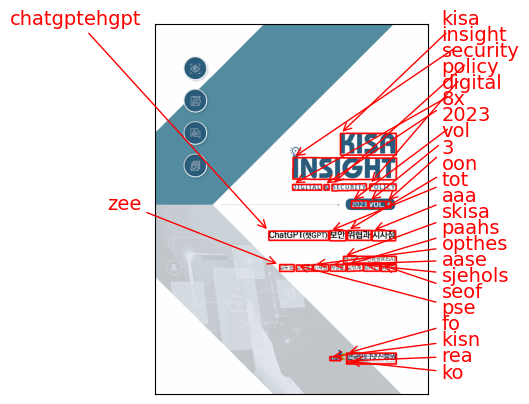

In [54]:
cdp.show_drawings(image_path=img_path, predictions=predictions)

In [49]:
predictions[0][0]

'hen'

In [50]:
texts = [predictions[i][0] for i in range(len(predictions))]
texts

['hen',
 'thelas',
 'epas',
 'sase',
 'ddc',
 'satg',
 'dod',
 'a31ae',
 'g',
 'agaa',
 'scupperli',
 'sx',
 'ddg',
 '32227225',
 'dk',
 'cross',
 'bar',
 'aatio',
 'dol',
 'a',
 'ase',
 'ddim',
 'ret',
 'ddr',
 'dds',
 'ruleslspec',
 'zale',
 'saoret',
 'zesrte',
 'saxexh',
 'e',
 's',
 'extte',
 'dmt',
 'cgte',
 'ls',
 'ie',
 'e',
 'aaaos',
 'hest',
 'pdr',
 'cross',
 'tath',
 'aspor',
 'dcn',
 'cino',
 'bar',
 'por',
 'non',
 'mxuri',
 'tss',
 'pev',
 'tgn',
 'pew',
 'ariel',
 'pfd',
 'theo',
 'ss',
 'es',
 'tejxt',
 'maker',
 'claim',
 '22',
 'pmc',
 'ino',
 'cal',
 '32271',
 'alzz7',
 'sas',
 'ohli',
 'maker',
 'ipmms',
 'phea',
 'omehod',
 '3223eh',
 'azz5',
 'gad',
 'xhaohlit',
 'dcn',
 'scmosan',
 '3247',
 'sen',
 'olsz',
 'oplia',
 'pmo',
 '3225ka',
 'a4by',
 'hies',
 'e',
 'extrafcredit',
 'toohlt',
 'poe',
 'acino',
 'ese',
 's',
 'ex',
 'thgeo',
 'ce',
 's7',
 'pcst',
 'ppm',
 'ottaga',
 'goth',
 'listol',
 '70s',
 'spses',
 'sttl',
 'opaato',
 'etae',
 'psr',
 'pipe',
 'pc